# EDA - Exploration of Customer Purchasing behavior
 Let's explore the behaviour of customers in the various stores. Our goal is to check how some measures such as promos and opening of new stores affect purchasing behavior. 

### Data Fields


| **Data fields**     | **Description** |    
|---------------------|:------------
| Id                  |   an Id that represents a (Store, Date) duple within the test set | 
| Store               |    a unique Id for each store                                     |   
| Sales               |  the turnover for any given day (this is what you are predicting)|   
| Customers           | the number of customers on a given day |   
| Open                | an indicator for whether the store was open: 0 = closed, 1 = open |   
| StateHoliday        | indicates a state holiday. Normally all stores, with few exceptions, are closed on state                         holidays. Note that all schools are closed on public holidays and weekends. a = public                            holiday, b = Easter holiday, c = Christmas, 0 = None|   
| SchoolHoliday       | indicates if the (Store, Date) was affected by the closure of public schools|   
| StoreType           | differentiates between 4 different store models: a, b, c, d |   
| Assortment          | describes an assortment level: a = basic, b = extra, c = extended. Read more about                                assortment here|   
| CompetitionDistance | the distance in meters to the nearest competitor store |   
| CompetitionOpenSince[Month/Year]| gives the approximate year and month of the time the nearest competitor has                            opened |   
| Promo           |indicates whether a store is running a promo on that day|   
| Promo2          | Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not                                 participating, 1 = store is participating |   
| Promo2Since[Year/Week]| describes the year and calendar week when the store started participating in Promo2|   
| PromoInterval|describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store| 







In [1]:
#imports
import sys
import os
import pandas as pd
import numpy as np
from datetime import datetime

#visiualization
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#config
sys.path.insert(0, '../src/')
sns.set()

In [3]:
#read store.csv file
store_df = pd.read_csv('../data/raw/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
#read test.csv file
test_df = pd.read_csv('../data/raw/test.csv', low_memory=False)
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
#read train.csv file
train_df = pd.read_csv('../data/raw/train.csv', low_memory=False)
print(train_df.shape)
train_df.head()


(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
train_df.index


RangeIndex(start=0, stop=1017209, step=1)

1. Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

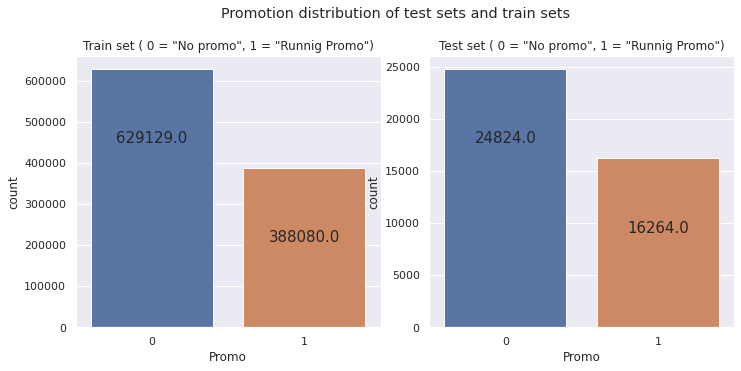

In [147]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Promotion distribution of test sets and train sets')
ax[0].set_title('Train set ( 0 = "No promo", 1 = "Runnig Promo")')
ax[1].set_title('Test set ( 0 = "No promo", 1 = "Runnig Promo")')
plt.tight_layout()
plot1 = sns.countplot(data=train_df, x='Promo', ax=ax[0])
plot2 = sns.countplot(data=test_df, x='Promo', ax=ax[1])

for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -70),
                   textcoords='offset points')
for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=15,
                   xytext=(0, -70),
                   textcoords='offset points')

2.  Check & compare sales behavior before, during and after holidays

In [148]:
# Sales the entire time series
train_df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [149]:
# sales during the holidays period
train_dur_hd_df = train_df[(train_df.StateHoliday != 0) & (train_df.SchoolHoliday == 1)]
train_dur_hd_df['Sales'].describe()

count    181721.000000
mean       6476.522207
std        3709.677337
min           0.000000
25%        4447.000000
50%        6197.000000
75%        8343.000000
max       38367.000000
Name: Sales, dtype: float64

In [150]:
train_dur_hd_df['Customers'].describe()

count    181721.000000
mean        704.412941
std         447.478907
min           0.000000
25%         480.000000
50%         654.000000
75%         881.000000
max        5192.000000
Name: Customers, dtype: float64

In [155]:

train_dur_hd_df = train_df[(train_df.StateHoliday != '0') | (train_df.SchoolHoliday == 1)]
holidays_date = train_dur_hd_df['Date'].unique()
# eve = 
# holidays

print('There are {} Holiday Dates'.format(len(holidays_date)))
train_dur_hd_df.shape

There are 487 Holiday Dates


(197260, 9)

<AxesSubplot:xlabel='StateHoliday', ylabel='count'>

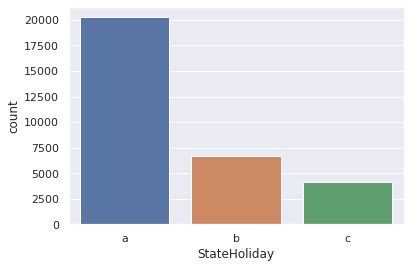

In [117]:
state_holiday_df = train_df[train_df.StateHoliday != '0']
sns.countplot(data=state_holiday_df, x='StateHoliday')


In [135]:
school_holiday_df = train_df[train_df.SchoolHoliday == 1]

3. Find out any seasonal (Christmas, Easter etc) purchase behaviors,

In [138]:
seasonal = train_df.groupby('StateHoliday').agg({'Sales':'mean', 'Customers':'mean'})
seasonal = seasonal.iloc[1:,:]
seasonal

,Sales,Customers
StateHoliday,,
a,290.735686,43.817670
b,214.311510,36.561883
c,168.733171,27.174390


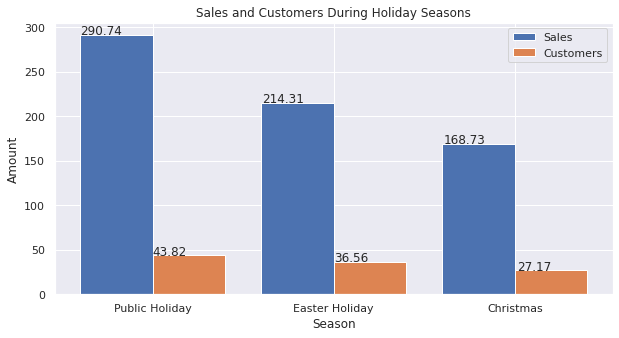

In [142]:
seasonal.index = ['Public Holiday','Easter Holiday','Christmas']
X_axis = np.arange(len(seasonal.index))
plt.figure(figsize=(10, 5))
plt1 = plt.bar(X_axis - 0.2, seasonal['Sales'], 0.4, label='Sales')
for p in plt1.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                * 1.005, p.get_height() * 1.005))
plt2 = plt.bar(X_axis + 0.2, seasonal['Customers'], 0.4, label='Customers')
for p in plt2.patches:
    plt.annotate('{:.2f}'.format(p.get_height()), (p.get_x()
                                       * 1.005, p.get_height() * 1.005))
                                       
plt.xticks(X_axis, seasonal.index)
plt.xlabel("Season")
plt.ylabel("Amount")
plt.title("Sales and Customers During Holiday Seasons")
plt.legend()


4. What can you say about the correlation between sales and number of customers?

In [133]:
#correlation between sales and customer
train_df.loc[:,['Sales','Customers']].corr()

,Sales,Customers
Sales,1.000000,0.894711
Customers,0.894711,1.000000


<AxesSubplot:xlabel='Sales', ylabel='Customers'>

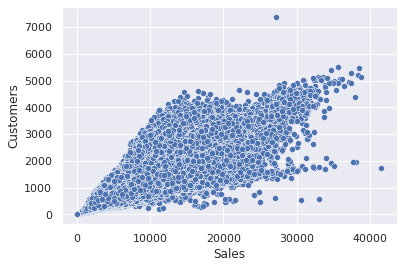

In [62]:
cust_nd_sales_df = train_df[['Date','Sales', 'Customers']]
cust_nd_sales_df.head()
sns.scatterplot(data=cust_nd_sales_df, x='Sales', y='Customers')

5. How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [63]:
# the correlation between promo and sales
train_df.loc[:, ['Sales','Promo']].corr()

,Sales,Promo
Sales,1.000000,0.452345
Promo,0.452345,1.000000


<AxesSubplot:title={'center':'Promo vs.Customers'}, xlabel='Promo', ylabel='Customers'>

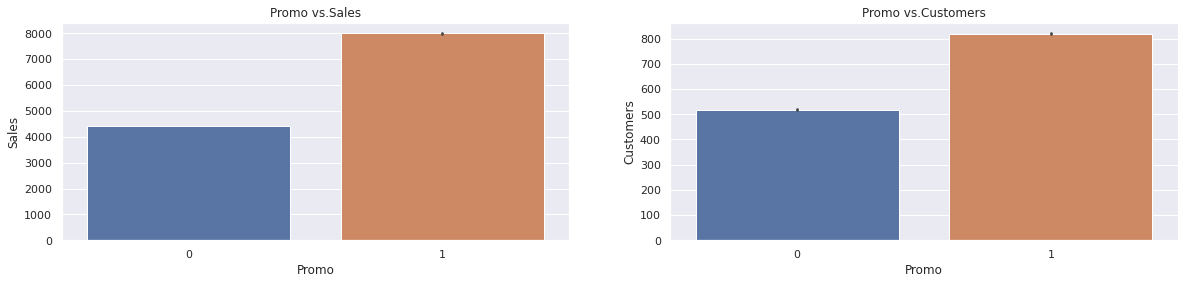

In [12]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(20,4))

axis1.title.set_text('Promo vs.Sales')
axis2.title.set_text('Promo vs.Customers')
sns.barplot(x='Promo', y='Sales', data=train_df, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=train_df, ax=axis2)

6. Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


<AxesSubplot:>

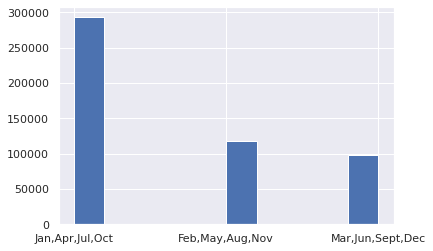

In [11]:
#PromoInterval
train_df['PromoInterval'].hist()

Clearly, most of the stores prefer the Jan,Apr,Jul,Oct Promo interval.

7. Trends of customer behavior during store open and closing times


In [156]:
customer_behaviour = train_df.groupby('Open').agg({'Customers':'mean','Sales':'mean'})
customer_behaviour

,Customers,Sales
Open,,
0,0.000000,0.000000
1,762.728395,6955.514291


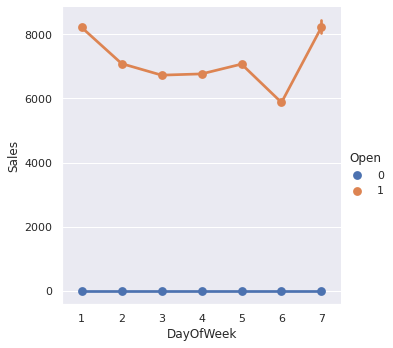

In [157]:
sns.catplot(data=train_df, x="DayOfWeek", y="Sales", hue="Open", kind='point')


8. Which stores are opened on all weekdays? How does that affect their sales on weekends?

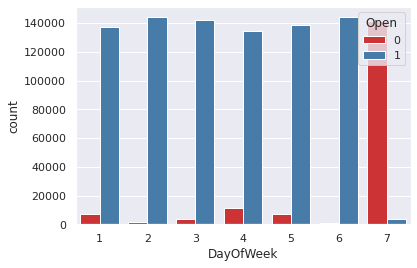

In [8]:
#Open_DayOfWeek
sns.countplot( x='DayOfWeek', data=train_df, hue="Open", palette="Set1");

Since the data has been taken from European Countries, we can assume that number 7 represent sunday thus, almost all the stores are closed at the weekend.

9. Check how the assortment type affects sales


[]

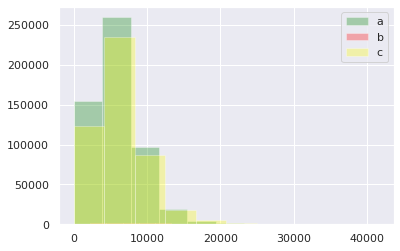

In [10]:
#Sales_Assortment

train_df = pd.merge(train_df, store_df, how= 'left', on='Store')
sns.set()
plt.hist(train_df[train_df['Assortment'] == 'a'].Sales, color='green', alpha=0.3, label = 'a')
plt.hist(train_df[train_df['Assortment'] == 'b'].Sales, color='red', alpha=0.3, label = 'b')
plt.hist(train_df[train_df['Assortment'] == 'c'].Sales, color='yellow', alpha=0.3, label = 'c')
plt.legend()
plt.plot()

Stores with Assortment 'b' look like having much less maximum sales than the others.

10. How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

In [15]:

train_df = pd.merge(train_df, store_df, how= 'left', on='Store')
comp_dist_df = train_df.loc[:, ['Store','Sales','Customers','CompetitionDistance']]
comp_dist_df = comp_dist_df.dropna()
comp_dist_df.shape

(1014567, 4)

In [16]:
group_comp_dist = train_df.groupby('Store', as_index=False).median()
group_comp_dist

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance_x,CompetitionOpenSinceMonth_x,CompetitionOpenSinceYear_x,...,CompetitionOpenSinceYear_y,Promo2_y,Promo2SinceWeek_y,Promo2SinceYear_y,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,4.0,4373.5,529.0,1.0,0.0,0.0,1270.0,9.0,2008.0,...,2008.0,0.0,NaN,NaN,1270.0,9.0,2008.0,0.0,NaN,NaN
1,2,4.0,4395.5,542.0,1.0,0.0,0.0,570.0,11.0,2007.0,...,2007.0,1.0,13.0,2010.0,570.0,11.0,2007.0,1.0,13.0,2010.0
2,3,4.0,5892.0,705.0,1.0,0.0,0.0,14130.0,12.0,2006.0,...,2006.0,1.0,14.0,2011.0,14130.0,12.0,2006.0,1.0,14.0,2011.0
3,4,4.0,9062.0,1261.5,1.0,0.0,0.0,620.0,9.0,2009.0,...,2009.0,0.0,NaN,NaN,620.0,9.0,2009.0,0.0,NaN,NaN
4,5,4.0,4180.0,537.0,1.0,0.0,0.0,29910.0,4.0,2015.0,...,2015.0,0.0,NaN,NaN,29910.0,4.0,2015.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,4.0,4614.0,431.0,1.0,0.0,0.0,1900.0,6.0,2014.0,...,2014.0,1.0,31.0,2013.0,1900.0,6.0,2014.0,1.0,31.0,2013.0
1111,1112,4.0,8707.0,755.0,1.0,0.0,0.0,1880.0,4.0,2006.0,...,2006.0,0.0,NaN,NaN,1880.0,4.0,2006.0,0.0,NaN,NaN
1112,1113,4.0,6018.5,675.5,1.0,0.0,0.0,9260.0,NaN,NaN,...,NaN,0.0,NaN,NaN,9260.0,NaN,NaN,0.0,NaN,NaN
1113,1114,4.0,19556.5,3086.0,1.0,0.0,0.0,870.0,NaN,NaN,...,NaN,0.0,NaN,NaN,870.0,NaN,NaN,0.0,NaN,NaN


11. How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance